# Python questions

### Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5


In [42]:
def find_len(string):
    words = string.split()

    word_frequency = {}
    for word in words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1

    max_frequency = max(word_frequency.values())
    highest_frequency_words = [word for word, frequency in word_frequency.items() if frequency == max_frequency]

    highest_frequency_word_length = len(highest_frequency_words[0])

    return highest_frequency_word_length

# test case 0
string = "write write write all the number from from from 1 to 100"
print(find_len(string))  # Output: 5

# test case 1
string = "a a a a b b b b c c c c"
print(find_len(string))  # Output: 1

# test case 2
string = "i attend ineuron class daily."
print(find_len(string))  # Output: 3


5
1
1


### Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }
Example output 1- YES
Example input 2 - s “abccc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
Example output 2 - NO

In [2]:
def isValid(s):
    d = {}
    for c in s:
        if c not in d:
            d[c] = 1
        else:
            d[c] += 1
    print(d)

    freq = {}
    for value in d.values():
        if value not in freq:
            freq[value] = 1
        else:
            freq[value] += 1
    print(freq)

    if len(freq) == 1:
        return 'YES'

    if len(freq) == 2:
        min_freq = min(freq.keys())
        max_freq = max(freq.keys())
        if freq[max_freq] == 1 and (max_freq - min_freq) == 1:
            return 'YES'
        if freq[min_freq] == 1 and min_freq == 1:
            return 'YES'

    return 'NO'

print(isValid('abc'))
print(isValid('aabbccd'))
print(isValid('aaabcd'))

{'a': 1, 'b': 1, 'c': 1}
{1: 3}
YES
{'a': 2, 'b': 2, 'c': 2, 'd': 1}
{2: 3, 1: 1}
YES
{'a': 3, 'b': 1, 'c': 1, 'd': 1}
{3: 1, 1: 3}
NO


### Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.
Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

Data Attributes - id: Identification Number - int num: Number of the
● Pokémon in the official Pokédex - int name: Pokémon name -
● string img: URL to an image of this Pokémon - string type:
● Pokémon type -string height: Pokémon height - float
● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given
● when transferred - string candy_count: the amount of candies required to evolve - int
● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:
● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int
● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of
● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict


In [ ]:
import pandas as pd
import numpy as np
!pip install requests
import requests
url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
response = requests.get(url)
data = response.json()
df = pd.json_normalize(data['pokemon'])
df.to_excel('pokemon_data.xlsx', index=False)
pd.DataFrame(df)
df2=pd.read_excel("pokemon_data.xlsx")
df2['height']=df2['height'].str.replace('m','')
df2['height']
df2['height']=df2.height.astype(float)
df2['weight'] = df2['weight'].str.replace('kg','')
df2['egg']=df2['egg'].str.replace('km','')
df2['egg']=df2['egg'].str.replace('Not in Eggs','0')
df2['egg']=df2['egg'].replace('0',np.nan)
df2.drop(index=138,axis=0,inplace=True)
df2['egg']=df2.egg.astype(float)
df2['spawn_time'] = pd.to_datetime(df2['spawn_time'], format='%H:%M').dt.hour
df2.to_excel('pokemon_data1.xlsx',index=False)
df2

### Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json


In [204]:
import requests
import pandas as pd
url = 'https://data.nasa.gov/resource/y77d-th95.json'

response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df=pd.DataFrame(df)
df1=pd.json_normalize(df.geolocation)
df['point coordinates'] = df1['coordinates']
df.drop(columns=['geolocation',':@computed_region_cbhk_fwbd',':@computed_region_nnqa_25f4'],inplace=True)
df['year'] = df['year'].str.replace('T',' ')
df['year'] = pd.to_datetime(df['year'],errors='coerce')
df.to_csv('nasa_data.csv', index=False)
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,point coordinates
0,Aachen,1,Valid,L5,21,Fell,1880-01-01,50.775000,6.083330,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01,56.183330,10.233330,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01,54.216670,-113.000000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01,16.883330,-99.900000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780,Fell,1902-01-01,-33.166670,-64.950000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230,Fell,1934-01-01,13.633330,79.416670,"[79.41667, 13.63333]"
996,Tissint,54823,Valid,Martian (shergottite),7000,Fell,2011-01-01,29.481950,-7.611230,"[-7.61123, 29.48195]"
997,Tjabe,24011,Valid,H6,20000,Fell,1869-01-01,-7.083330,111.533330,"[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01,-6.666670,106.583330,"[106.58333, -6.66667]"


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               1000 non-null   object        
 1   id                 1000 non-null   object        
 2   nametype           1000 non-null   object        
 3   recclass           1000 non-null   object        
 4   mass               972 non-null    object        
 5   fall               1000 non-null   object        
 6   year               982 non-null    datetime64[ns]
 7   reclat             988 non-null    object        
 8   reclong            988 non-null    object        
 9   point coordinates  988 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 78.2+ KB


### Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

Excepted Output Data Attributes -
● id - int url - string
● name - string season
● - int number - int
● type - string airdate -
● date format airtime -
● 12-hour time format
● runtime - float
● average rating - float
● summary - string
● without html tags
● medium image link - string
● Original image link - string

In [387]:
import requests
import pandas as pd
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
response=requests.get(url)
data = response.json()['_embedded']['episodes']
df = pd.json_normalize(data)
df.drop(['airstamp','_links.self.href','_links.show.href'],inplace=True,axis=1)
df['summary']=df['summary'].str.replace('<p>','')
df['summary']=df['summary'].str.replace('</p>','')
df['summary']=df['summary'].str.replace('<br />','')
df.to_excel('tvmaze.xlsx',index=False)

In [388]:
df.head(2)

,id,url,name,season,number,type,airdate,airtime,runtime,summary,rating.average,image.medium,image.original
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,A woman named Dolores is a free spirit in the ...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,Bernard suspects that someone is sabotaging th...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


### Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

In [314]:
df1 = pd.read_excel('pokemon_data1.xlsx')

In [389]:
df1.head(2)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weakness_count
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25.0,2.0,0.690,69.0,20.0,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100.0,NaN,0.042,4.2,7.0,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4


In [357]:
weakness_count=[]
for i in range(len(df1)):
    weakness_count.append(len(df1.weaknesses[i].split(',')))

df1['weakness_count']= weakness_count

In [364]:
df1[df1.weakness_count<4]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weakness_count
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25.0,2.0,0.2530,25.30,8.0,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100.0,NaN,0.0120,1.20,19.0,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70,90.5,Charmander Candy,NaN,NaN,0.0031,0.31,13.0,NaN,"['Water', 'Electric', 'Rock']",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':...",3
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51,9.0,Squirtle Candy,25.0,2.0,0.5800,58.00,4.0,[2.1],"['Electric', 'Grass']","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN,2
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99,22.5,Squirtle Candy,100.0,NaN,0.0340,3.40,7.0,[1.4],"['Electric', 'Grass']","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01,60.0,None,NaN,NaN,0.0000,0.00,NaN,NaN,"['Water', 'Electric', 'Rock']",NaN,NaN,3
145,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80,3.3,Dratini Candy,25.0,10.0,0.3000,30.00,6.0,"[1.83, 1.84]","['Ice', 'Dragon', 'Fairy']","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN,3
146,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99,16.5,Dratini Candy,100.0,NaN,0.0200,2.00,11.0,[2.05],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",3
148,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01,122.0,None,NaN,NaN,0.0000,0.00,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN,3


### Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('nasa_data.csv')
df['year'] = pd.to_datetime(df['year'],errors='coerce')

<AxesSubplot:xlabel='year', ylabel='Count'>

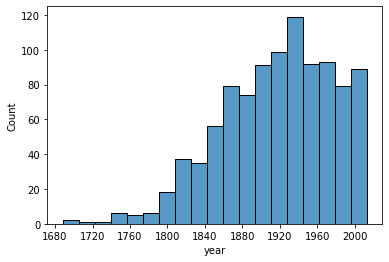

In [262]:
sns.histplot(df.year)

In [222]:
df[df['year'].dt.year<2000]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,point coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01,54.50000,35.20000,"[35.2, 54.5]"
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01,13.63333,79.41667,"[79.41667, 13.63333]"
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01,-6.66667,106.58333,"[106.58333, -6.66667]"


In [223]:
df[df['year'].dt.year<1970][['year','point coordinates']]

,year,point coordinates
0,1880-01-01,"[6.08333, 50.775]"
1,1951-01-01,"[10.23333, 56.18333]"
2,1952-01-01,"[-113, 54.21667]"
4,1902-01-01,"[-64.95, -33.16667]"
5,1919-01-01,"[71.8, 32.1]"
...,...,...
994,1807-01-01,"[35.2, 54.5]"
995,1934-01-01,"[79.41667, 13.63333]"
997,1869-01-01,"[111.53333, -7.08333]"
998,1922-01-01,"[106.58333, -6.66667]"


In [224]:
df[df['mass']>10000]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,point coordinates
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01,44.21667,0.61667,"[0.61667, 44.21667]"
11,Aïr,424,Valid,L6,24000.0,Fell,1925-01-01,19.08333,8.38333,"[8.38333, 19.08333]"
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981-01-01,39.91667,42.81667,"[42.81667, 39.91667]"
27,Alfianello,466,Valid,L6,228000.0,Fell,1883-01-01,45.26667,10.15000,"[10.15, 45.26667]"
...,...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,Fell,1878-01-01,49.60000,17.11667,"[17.11667, 49.6]"
992,Tilden,23998,Valid,L6,74800.0,Fell,1927-01-01,38.20000,-89.68333,"[-89.68333, 38.2]"
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01,54.50000,35.20000,"[35.2, 54.5]"
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]"


## Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd

def download_and_extract_data(url):
    # Download the data from the API link
    response = requests.get(url)
    data = response.json()

 
    show_id = data['id']
    show_url = data['url']
    show_name = data['name']
    episodes = data['_embedded']['episodes']

    episode_list = []
    for episode in episodes:
        episode_name = episode['name']
        episode_season = episode['season']
        episode_number = episode['number']
        episode_type = episode['type']
        episode_airdate = episode['airdate']
        episode_airtime = episode['airtime']
        episode_runtime = episode['runtime']
        episode_rating = episode['rating']['average']
        episode_summary = BeautifulSoup(episode['summary'], 'html.parser').get_text()
        episode_image_medium = episode['image']['medium']
        episode_image_original = episode['image']['original']

        episode_info = {
            'ID': show_id,
            'URL': show_url,
            'Name': show_name,
            'Episode Name': episode_name,
            'Season': episode_season,
            'Number': episode_number,
            'Type': episode_type,
            'Airdate': episode_airdate,
            'Airtime': episode_airtime,
            'Runtime': episode_runtime,
            'Rating': episode_rating,
            'Summary': episode_summary,
            'Medium Image': episode_image_medium,
            'Original Image': episode_image_original
        }
        episode_list.append(episode_info)


    df = pd.DataFrame(episode_list)
    return df

In [2]:
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'

df = download_and_extract_data(url)

df


,ID,URL,Name,Episode Name,Season,Number,Type,Airdate,Airtime,Runtime,Rating,Summary,Medium Image,Original Image
0,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Adversary,1,6,regular,2016-11-06,21:00,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Trace Decay,1,8,regular,2016-11-20,21:00,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Bicameral Mind,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [3]:
df.groupby('Season').mean()

,ID,Number,Runtime,Rating
Season,,,,
1,1371.0,5.5,63.800,8.0900
2,1371.0,5.5,65.500,8.0000
3,1371.0,4.5,64.375,7.7750
4,1371.0,4.5,57.000,7.5375


In [6]:
x=df.groupby('Season').mean().index
y=df.groupby('Season').mean()['Rating']
y

Season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: Rating, dtype: float64

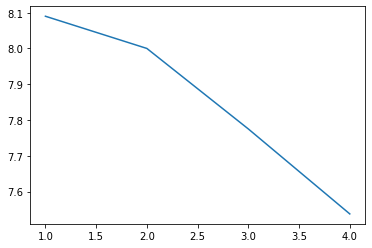

In [10]:
plt.plot(x,y)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Rating'>

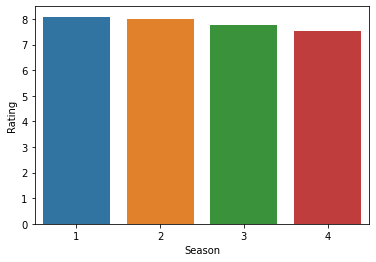

In [11]:
sns.barplot(x,y)

### Get all the episode names, whose average rating is more than 8 for every season:

In [12]:
df[df['Rating'] > 8][['Episode Name', 'Rating']]

,Episode Name,Rating
6,Trompe L'Oeil,8.6
8,The Well-Tempered Clavier,8.5
9,The Bicameral Mind,8.7
17,Kiksuya,8.7
18,Vanishing Point,8.4
19,The Passenger,8.5


### Get all the episode names that aired before May 2019

In [13]:
import pandas as pd

df['date_column'] = pd.to_datetime(df['Airdate'])

# Filter the DataFrame for data until May 2019
filtered_df = df[df['date_column'] <= '2019-05']
filtered_df[['Episode Name', 'Airdate']]

,Episode Name,Airdate
0,The Original,2016-10-02
1,Chestnut,2016-10-09
2,The Stray,2016-10-16
3,Dissonance Theory,2016-10-23
4,Contrapasso,2016-10-30
5,The Adversary,2016-11-06
6,Trompe L'Oeil,2016-11-13
7,Trace Decay,2016-11-20
8,The Well-Tempered Clavier,2016-11-27
9,The Bicameral Mind,2016-12-04


### Get the episode name from each season with the highest and lowest rating:

In [16]:
df.head(2)

,ID,URL,Name,Episode Name,Season,Number,Type,Airdate,Airtime,Runtime,Rating,Summary,Medium Image,Original Image,date_column
0,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016-10-02
1,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016-10-09


In [17]:
season_1 = df[df['Season'] == 1]
season_2 = df[df['Season'] == 2]
season_3 = df[df['Season'] == 3]
season_4 = df[df['Season'] == 4]
list_of_seasons = [season_1, season_2, season_3, season_4]

In [18]:
def low_high_ratings(season):
    """returns Low-High ratings per season"""
    ep_with_low_rat = list(season[season['Rating'] == season['Rating'].min()]['Episode Name'])
    ep_with_high_rat = list(season[season['Rating'] == season['Rating'].max()]['Episode Name'])
    return(
        ep_with_low_rat, ep_with_high_rat
    )

In [19]:
season_no = 1 
for i in list_of_seasons:
    ep_with_low_rat, ep_with_high_rat = low_high_ratings(i)
    print(f"Episodes with Hight ratings for season {season_no}: ", ep_with_high_rat)
    print(f"Episodes with low ratings for season {season_no}: ", ep_with_low_rat)
    season_no +=1 
    print("----------------------------------------")

Episodes with Hight ratings for season 1:  ['The Bicameral Mind']
Episodes with low ratings for season 1:  ['The Stray']
----------------------------------------
Episodes with Hight ratings for season 2:  ['Kiksuya']
Episodes with low ratings for season 2:  ['Akane No Mai']
----------------------------------------
Episodes with Hight ratings for season 3:  ['Parce Domine', 'The Mother of Exiles']
Episodes with low ratings for season 3:  ['Decoherence', 'Passed Pawn']
----------------------------------------
Episodes with Hight ratings for season 4:  ['Zhuangzi']
Episodes with low ratings for season 4:  ['The Auguries']
----------------------------------------


### Get the summary for the most popular ( ratings ) episode in every season

In [20]:
high_rating_per_season = df.groupby('Season')['Rating'].max()

In [21]:
episodes_with_high_rat_for_season = []

def summary_of_high_rating(high_rating_per_season):
    for season, rating in high_rating_per_season.items():
        # print(season, rating)
        episodes = list(df[(df['Season'] == int(season)) & (df['Rating'] == rating)]['Episode Name'])
        for i in episodes:
            print(f"Season: {season}, Highest rating: {rating}")
            print(f'{i}:')
            print( df[df['Episode Name'] == i]['Summary'])
            print("-----------------------------")
            

summary_of_high_rating(high_rating_per_season)

Season: 1, Highest rating: 8.7
The Bicameral Mind:
9    Delores finds out the truth about William's fa...
Name: Summary, dtype: object
-----------------------------
Season: 2, Highest rating: 8.7
Kiksuya:
17    Another of Westworld's Host revolutionaries is...
Name: Summary, dtype: object
-----------------------------
Season: 3, Highest rating: 8.0
Parce Domine:
20    If you're stuck in a loop, try walking in a st...
Name: Summary, dtype: object
-----------------------------
Season: 3, Highest rating: 8.0
The Mother of Exiles:
23    The truth doesn't always set you free.
Name: Summary, dtype: object
-----------------------------
Season: 4, Highest rating: 7.8
Zhuangzi:
32    God is bored.
Name: Summary, dtype: object
-----------------------------


## Question 9 -

Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after
2015

● Draw plots to show the distribution between city and electric vehicle type

In [23]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10


In [24]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [25]:
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible'][['Make','Model','Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']]

,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
6,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
7,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
8,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
11,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
14,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
...,...,...,...,...
130437,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
130438,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
130439,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
130440,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...


### Get all TESLA cars with the model year, and model type made in Bothell City

In [26]:
df[(df['Make']== 'TESLA') & (df['City'] == 'Bothell')][['Model', 'Model Year']]

,Model,Model Year
39,MODEL 3,2020
217,MODEL 3,2022
218,MODEL Y,2022
222,MODEL 3,2018
292,MODEL X,2017
...,...,...
129778,MODEL 3,2019
129954,MODEL 3,2021
129976,MODEL S,2014
130295,MODEL 3,2022


### Get all the cars that have an electric range of more than 100, and were made after 2015

In [27]:
df[(df['Model Year'] > 2015 ) & (df['Electric Range'] > 100)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


### Draw plots to show the distribution between city and electric vehicle type

In [28]:
df['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [31]:
list_of_cities = df['City'].unique()
print(len(list_of_cities))

657


In [30]:
df.groupby("City")["Electric Vehicle Type"].count()

City
Aberdeen          115
Acme                7
Addy                2
Aiea                1
Airway Heights     18
                 ... 
Yacolt             32
Yakima            471
Yarrow Point      126
Yelm              197
Zillah             23
Name: Electric Vehicle Type, Length: 656, dtype: int64

In [32]:
top_20 = df.groupby("City")["Electric Vehicle Type"].count().sort_values(ascending=False)[:20]

In [33]:
x = list(dict(top_20).keys())
y = list(dict(top_20).values())

<AxesSubplot:>

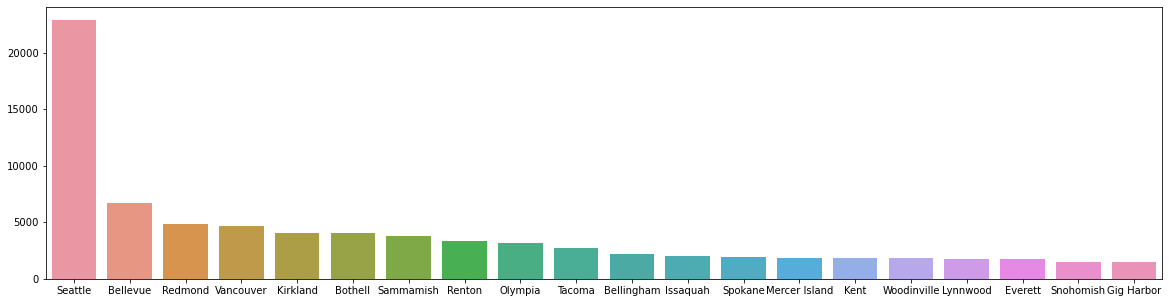

In [34]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x=x, y=y)

## Question 10 -

Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [40]:
import re

def count_pos_tags(text):
    # Define regular expressions for matching different parts of speech
    noun_pattern = re.compile(r'\b[A-Za-z]+[s]?\b', re.IGNORECASE)
    pronoun_pattern = re.compile(r'\b(I|me|my|mine|you|your|yours|he|him|his|she|her|hers|it|its|we|us|our|ours|they|them|their|theirs)\b', re.IGNORECASE)
    verb_pattern = re.compile(r'\b[A-Za-z]+(?:s|ed|ing)?\b', re.IGNORECASE)
    adjective_pattern = re.compile(r'\b[A-Za-z]+\b', re.IGNORECASE)

    # Initialize counts
    noun_count = 0
    pronoun_count = 0
    verb_count = 0
    adjective_count = 0

    # Find matches for each part of speech
    noun_matches = re.findall(noun_pattern, text)
    pronoun_matches = re.findall(pronoun_pattern, text)
    verb_matches = re.findall(verb_pattern, text)
    adjective_matches = re.findall(adjective_pattern, text)

    # Count the matches
    noun_count = len(noun_matches)
    pronoun_count = len(pronoun_matches)
    verb_count = len(verb_matches)
    adjective_count = len(adjective_matches)

    # Create and return the dictionary
    pos_counts = {
        'nouns': noun_count,
        'pronouns': pronoun_count,
        'verbs': verb_count,
        'adjectives': adjective_count
    }
    return pos_counts

# Test case 1
text = "i attend ineuron class daily."
result = count_pos_tags(text)
print(result)

#Test case 2
text = "I like to do swimming, I jumped into a lake yesterday. accidentally went deep and it was dark. I got scared and rushed upwards"
result = count_pos_tags(text)
print(result)

{'nouns': 5, 'pronouns': 1, 'verbs': 5, 'adjectives': 5}
{'nouns': 24, 'pronouns': 4, 'verbs': 24, 'adjectives': 24}


### OR

In [41]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag

def count_pos(phrase):
    # Tokenize the phrase into words
    words = word_tokenize(phrase)
    
    # Tag each word with its part of speech
    tagged_words = pos_tag(words)
    
    # Initialize count variables
    noun_count = 0
    verb_count = 0
    pronoun_count = 0
    adjective_count = 0
    
    # Count the occurrences of each part of speech
    for word, tag in tagged_words:
        if tag.startswith('N'):  # Noun
            noun_count += 1
        elif tag.startswith('V'):  # Verb
            verb_count += 1
        elif tag.startswith('PR'):  # Pronoun
            pronoun_count += 1
        elif tag.startswith('J'):  # Adjective
            adjective_count += 1
    
    # Create a dictionary with the counts
    pos_counts = {
        'nouns': noun_count,
        'verbs': verb_count,
        'pronouns': pronoun_count,
        'adjectives': adjective_count
    }
    
    return pos_counts

# Example usage:
phrase1 = "i attend ineuron class daily."
counts = count_pos(phrase)
print(phrase1)
print(counts)
phrase2 = "I like to do swimming, I jumped into a lake yesterday. accidentally went deep and it was dark. I got scared and rushed upwards"
counts = count_pos(phrase2)
print(phrase2)
print(counts)


i attend ineuron class daily.
{'nouns': 3, 'verbs': 1, 'pronouns': 0, 'adjectives': 2}
I like to do swimming, I jumped into a lake yesterday. accidentally went deep and it was dark. I got scared and rushed upwards
{'nouns': 4, 'verbs': 7, 'pronouns': 4, 'adjectives': 3}
